<hr>
<div style="background-color: lightgray; padding: 20px; color: black;">
<div>
<img src="https://th.bing.com/th/id/R.3cd1c8dc996c5616cf6e65e20b6bf586?rik=09aaLyk4hfbBiQ&riu=http%3a%2f%2fcidics.uanl.mx%2fwp-content%2fuploads%2f2016%2f09%2fcimat.png&ehk=%2b0brgMUkA2BND22ixwLZheQrrOoYLO3o5cMRqsBOrlY%3d&risl=&pid=ImgRaw&r=0" style="float: right; margin-right: 30px;" width="200"/> 
<font size="6.9" color="8C3061"><b>Curso de Optimización</b></font> <br>
<font size="4.5" color="8C3061"><b>Tarea 2 - Métodos de Búsqueda en línea</b></font> 
</div>
<div style="text-align: left">  <br>
Edison David Serrano Cárdenas. <br>
MSc en Matemáticas Aplicadas <br>
CIMAT - Sede Guanajuato <br>
</div>

</div>
<hr>


# <font color="8C3061" >**Cargar Librerías**</font> 

In [1]:
# basic libraries
import numpy as np
import scipy 
from typing import Tuple, Callable
from opti_functions.Opti_functions import gold_section_method

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
np.random.seed(0)

---

# <font color="8C3061" >**Ejercicio 1 (2.0 puntos)**</font>

Estimar la cantidad de iteraciones que requiere el algoritmo de descenso máximo
con paso exacto para alcanzar el minimizador  $\mathbf{x}_*$ de la función 
cuadrática 

$$ f(\mathbf{x}) = \frac{1}{2} \mathbf{x}^\top\mathbf{A}\mathbf{x}-\mathbf{b}^\top\mathbf{x}  $$ 

donde $\mathbf{A}$ es una matriz simétrica y definida positiva que 
su información y la del arreglo $\mathbf{b}$ está almacenada en archivo en formato `npz`
contenido en el archivo `datosTarea02.zip`.

Para hacer esto, calculamos el minimizador $\mathbf{x}_{*}$ de $f(\mathbf{x})$ resolviendo
el sistema de ecuaciones $\mathbf{A}\mathbf{x}_{*} = \mathbf{b}$ y definimos

$$q(\mathbf{x}) = \frac{1}{2} (\mathbf{x}-\mathbf{x}_{*})^\top\mathbf{A}(\mathbf{x}-\mathbf{x}_{*}).$$

Sabemos que $q(\mathbf{x})$ y $f(\mathbf{x})$ sólo difieren en una constante y podemos
usar $q(\mathbf{x})$ para estimar la manera en que decrece la función mediante el resultado
de la Proposición 6 de la Clase 6:
   
$$ q(\mathbf{x}_{k+1}) \leq \left(\frac{\lambda_{\max}(\mathbf{A})-\lambda_{\min}(\mathbf{A})}{
    \lambda_{\max}(\mathbf{A})+\lambda_{\min}(\mathbf{A})} \right)^2 q(\mathbf{x}_k). $$ 

Si 
   
$$ c = \frac{\lambda_{\max}(\mathbf{A})-\lambda_{\min}(\mathbf{A})}{
    \lambda_{\max}(\mathbf{A})+\lambda_{\min}(\mathbf{A})} , $$ 
    
entonces 

$$ q(\mathbf{x}_{k+1}) \leq c^2 q(\mathbf{x}_k) \leq c^4 q(\mathbf{x}_{k-1}) 
\leq c^6 q(\mathbf{x}_{k-2}) \leq ... \leq c^{2k} q(\mathbf{x}_{1}) \leq c^{2(k+1)} q(\mathbf{x}_{0}). $$

Como  
$$2q(\mathbf{x}_k) =  (\mathbf{x}-\mathbf{x}_{*})^\top\mathbf{A}(\mathbf{x}-\mathbf{x}_{*})
=  \|\mathbf{x}-\mathbf{x}_{*}\|^2_{\mathbf{A}},  $$ 

$q(\mathbf{x}_k)$ es una medida de la distancia al cuadrado de $\mathbf{x}_k$ a $\mathbf{x}_{*}$,
de modo dada una tolerancia $\tau>0$ podemos buscar el valor $k$ para el cual se cumpla

$$ \|\mathbf{x}_k-\mathbf{x}_{*}\|_{\mathbf{A}} = \sqrt{2q(\mathbf{x}_k)} 
\leq c^k \sqrt{2q(\mathbf{x}_0)} < \tau $$

y ese $k$ es la estimación de la cantidad de iteraciones que requiere el algoritmo.

1. Escriba una función que reciba como parámetro el nombre de un archivo  `npz`,
   lea el archivo y cree la matriz $\mathbf{A}$ y el vector $\mathbf{b}$  del archivo `npz`,
   y calcule el minimizador $\mathbf{x}_{*}$ de $f(\mathbf{x})$ resolviendo
   el sistema de ecuaciones $\mathbf{A}\mathbf{x}_{*} = \mathbf{b}$. Use la factorización
   de Cholesky para resolver el sistema de ecuaciones y de esta manera 
   saber si la matriz es definida positiva, y en este caso devolver 
   $\mathbf{A}$, $\mathbf{b}$ y $\mathbf{x}_{*}$. En caso contrario devolver
   $\mathbf{A}$, $\mathbf{b}$ y $None$.
2. Programe la función  que evalua la función 
   $q(\mathbf{x}) = \frac{1}{2} (\mathbf{x}-\mathbf{x}_{*})^\top\mathbf{A}(\mathbf{x}-\mathbf{x}_{*})$.
   La función recibe como parámetros el punto $\mathbf{x}$, la matriz $\mathbf{A}$ y el punto $\mathbf{x}_{*}$
   y devolver el valor de $q(\mathbf{x})$.
3. Programe una función estima la cantidad de iteraciones que el algoritmo requiere.
   Esta función recibe como argumentos la matriz $\mathbf{A}$, el punto $\mathbf{x}_0$,
   el punto $\mathbf{x}_*$ y una tolerancia $\tau>0$. 
   La función calcula la cantidad $c$ descrita anteriormente y determina el entero $k$ que cumple
   con $c^k \sqrt{2q(\mathbf{x}_0)} < \tau$. 
   La función debe devolver $k$ y $c$. 
4. Pruebe la función del punto anterior usando los datos de cada archivo `npz` contenidos
   en el archivo `datosTarea02.zip`. 
   Use la función del Punto 1 y si se pudo calcular $\mathbf{x}_{*}$,
   defina $n$ como el tamaño del vector $\mathbf{b}$, el  punto inicial 
   $\mathbf{x}_{0} = (10, 10, ..., 10)^\top$ de dimensión $n$ y  
   ejecute la función del Punto 3 usando como tolerancia $\tau = \sqrt{\epsilon_m}$, 
   donde $\epsilon_m$  es el épsilon de la máquina.
   
   Imprima el valor $n$, $q(\mathbf{x}_0)$, $k$, $c$.
   
**Nota:** Cada archivo `npz` en el ZIP tiene dos arreglos que corresponden a la matriz
$\mathbf{A}$ y el vector $\mathbf{b}$. Para leer los datos puede hacer, por ejemplo:

```
npzfile = np.load("datosTarea02/matA_vecb1.npz")
A  = npzfile['arr_0']
b  = npzfile['arr_1']
```

***Solución:***

1. Implementación de la función *read_file_qf*:

In [2]:
def read_file_df(path_file: str)->Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """ Reads a numpy file and returns the arrays A, b and x if A is positive definite, otherwise returns A,b,None.
    
    :param path_file: Path to the file to be read (str).
    
    :return: A, b, x if A is positive definite, otherwise A, b, None.
    """
    
    npzfile = np.load(path_file)
    A  = npzfile['arr_0']
    b  = npzfile['arr_1']
    
    try:        
        L = np.linalg.cholesky(A)
        y = scipy.linalg.solve_triangular(L, b,trans = 0, lower=True)
        x = scipy.linalg.solve_triangular(L, y,trans = 1, lower=True)
        return A, b, x
      
    except np.linalg.LinAlgError:
        print("Error: Cholesky factorization failed, Matrix A is not positive definite.")
        return A, b, None

2. Implementación de la función cuadratica:

In [3]:
def q_function( x: np.ndarray, A: np.ndarray, x_: np.ndarray) -> float:
    return 0.5 * (x-x_).T @ A @ (x-x_)

3. Implementación de la función que comenta la cantidad de iteraciones que requiere el algoritmo:

Tenemos que la desigualdad que nos describe una cota para el número de iteraciones viene dada por
$$c^k \sqrt{2q(\mathbf{x}_0)} < \tau$$
donde $k$ es el número de iteraciones, $\tau$ la tolerancia, $x_0$ el punto inicial y $c$ es el cociente entre la diferencia entre el mayor valor propio con el menor con respecto a su suma.

Despejando a $k$ de la expresión anterior, obtenemos que la cota se expresa como 

$$k>\frac{\log{(\tau)}-0.5\log{(2q(\mathbb{x}_0))}}{\log{(c)}}=\frac{\log{\left(\frac{\tau}{\sqrt{2q(\mathbb{x}_0)}}\right)}}{\log{(c)}}$$

In [4]:
def num_iteration_dg(A: np.ndarray, x0: np.ndarray, x_: np.ndarray, tol: float) -> Tuple[int,float]:
    """ Returns the estimated number of iterations of the gradient descent method to minimize a quadratic function.
    
    :param A: Matrix A of the quadratic function (np.ndarray)
    :param x0: Initial guess (np.ndarray)
    :param x_: Point x_ of the quadratic function (np.ndarray)
    :param tol: Tolerance for the residual (float)
    
    :return: Number of iterations, constant c of the convergence rate. (int, float)
    """
    
    eigvals = np.linalg.eigvals(A)
    c = (eigvals.max() - eigvals.min()) / (eigvals.max() + eigvals.min())
    
    k = np.ceil((np.log(tol) - 0.5*np.log(2*q_function(x0,A,x_))) / np.log(c))
    
    return int(k), c    

4. Evaluación de las funciones de los ejercicios anteriores con los archivos de la carpeta *datosTarea02*

In [5]:
files = ["./datosTarea02/matA_vecb"+str(i)+".npz" for i in range(1,5)]
tol = np.sqrt(np.finfo(float).eps)

Datos *"matA_vecb1"*:

In [6]:
A,b,x_ = read_file_df(files[0])
n = b.shape[0]
x0 = np.full(n, 10.0)
k,c = num_iteration_dg(A, x0, x_, tol)
print("Dimension of A: ", n)
print("q(x0): ", q_function(x0,A,x_))
print("sqrt(q(x0)): ", np.sqrt(q_function(x0,A,x_)))    
print("Number of iterations: ", k)
print("Constant c: ", round(c,6))

Dimension of A:  2
q(x0):  1113.15
sqrt(q(x0)):  33.363902649420375
Number of iterations:  54
Constant c:  0.666667


Datos *"matA_vecb2"*:

In [7]:
A,b,x_ = read_file_df(files[1])
n = b.shape[0]
x0 = np.full(n, 10.0)
k,c = num_iteration_dg(A, x0, x_, tol)
print("Dimension of A: ", n)
print("q(x0): ", q_function(x0,A,x_))
print("sqrt(q(x0)): ", np.sqrt(q_function(x0,A,x_)))    
print("Number of iterations: ", k)
print("Constant c: ", round(c,6))

Dimension of A:  10
q(x0):  2658.8249999999994
sqrt(q(x0)):  51.56379543827238
Number of iterations:  150
Constant c:  0.861036


Datos *"matA_vecb3"*:

In [8]:
A,b,x_ = read_file_df(files[2])
n = b.shape[0]
x0 = np.full(n, 10.0)
k,c = num_iteration_dg(A, x0, x_, tol)
print("Dimension of A: ", n)
print("q(x0): ", q_function(x0,A,x_))
print("sqrt(q(x0)): ", np.sqrt(q_function(x0,A,x_)))    
print("Number of iterations: ", k)
print("Constant c: ", round(c,6))

Dimension of A:  100
q(x0):  18134.27
sqrt(q(x0)):  134.66354369316144
Number of iterations:  8
Constant c:  0.041755


Datos *"matA_vecb4"*:

In [9]:
A,b,x_ = read_file_df(files[3])
n = b.shape[0]
x0 = np.full(n, 10.0)
k,c = num_iteration_dg(A, x0, x_, tol)
print("Dimension of A: ", n)
print("q(x0): ", q_function(x0,A,x_))
print("sqrt(q(x0)): ", np.sqrt(q_function(x0,A,x_)))    
print("Number of iterations: ", k)
print("Constant c: ", round(c,6))

Dimension of A:  500
q(x0):  543978.79
sqrt(q(x0)):  737.5491780213711
Number of iterations:  276
Constant c:  0.913211


---

# <font color="8C3061" >**Ejercicio 2 (3.0 puntos)**</font>

Programe el Algoritmo 2 de la Clase 5 para optimizar funciones cuadráticas de la forma
$$ f(\mathbf{x}) = \frac{1}{2} \mathbf{x}^\top\mathbf{A}\mathbf{x}-\mathbf{b}^\top\mathbf{x}  $$ 
con el método de descenso máximo con paso exacto.

1. La función que implementa el algoritmo recibe como argumentos:
- la matriz $\mathbf{A}$ (que se supone que es simétrica y definida positiva), 
- el vector $\mathbf{b}$ de la función cuadrática,
- un punto inicial $\mathbf{x}_{0}$ 
- una tolerancia $\tau$ y 
- el número máximo de iteraciones $N$.

La función debe devolver:
- El último punto $\mathbf{x}_{k}$ generado por el algoritmo,
- el número $k$ de iteraciones realizadas y
- Una variable indicadora que es $True$ si el algoritmo termina por 
  cumplirse la condición de paro ($\|\alpha_k \mathbf{g}_{k}\| < \tau$) o
  $False$ si termina porque se alcanzó el número máximo de iteraciones.



2. Programe la función que evalúa la función $f(\mathbf{x})$. 
   La función recibe como argumentos la matriz $\mathbf{A}$ y el vector $\mathbf{b}$,
   y devuelve el valor $\frac{1}{2} \mathbf{x}^\top\mathbf{A}\mathbf{x}-\mathbf{b}^\top\mathbf{x}$.
   
3. Pruebe el algoritmo con las matrices y vectores que se encuentran en los archivos
   `npz` que están contenidos en el archivo `datosTarea02.zip`:

Para cada archivo npy haga lo siguiente:
- Use la función del Punto 1 del Ejercicio 1 para obtener $\mathbf{A}$, $\mathbf{b}$
  y $\mathbf{x}_*$. Si $\mathbf{x}_*$ no es `None` continúe y 
  defina la variable $n$ como el tamaño del vector $\mathbf{b}$. Imprima el valor de $n$ 
  para saber la dimensión de la variable $\mathbf{x}$.
- Haga $\mathbf{x}_{0} = (10, 10, ..., 10)^\top$ de dimensión $n$.
- Defina la tolerancia $\tau = \sqrt{\epsilon_m}$, donde $\epsilon_m$
  es el épsilon de la máquina.
- Calcule el punto $\mathbf{x}_{k}$ con el algoritmo. Elija el número de iteraciones máximas
  para el algoritmo. Puede tomar como referencia el resultado en el Ejercicio 1. 
- Imprima los valores 

$$ f(\mathbf{x}_0), k, f(\mathbf{x}_k), \|\mathbf{x}_{k}-\mathbf{x}_{*}\|, $$

y $\mathbf{x}_{k}$ si $n\leq 6$, o los primeros tres elementos y los últimos tres elementos del arreglo $\mathbf{x}_{k}$ si $n>6$.

4. Escriba un comentario sobre si el número de iteraciones estimadas fue una buena cota superior.

***Solución:***

1. Implementación del método del máximo descenso:

In [10]:
def max_descend(A: np.ndarray, 
                b:np.ndarray, 
                x0: np.ndarray, 
                tol: float= 1e-6, 
                max_iter: int=300)->Tuple[int, np.ndarray, bool]:
    
    """Gradient descent method to minimize a quadratic function.
    
    :param A: Matrix A of the quadratic function (np.ndarray)
    :param b: Vector b of the quadratic function (np.ndarray)
    :param x0: Initial guess (np.ndarray)
    :param tol: Tolerance for the residual (float)
    :param max_iter: Maximum number of iterations (int)
    
    :return: Number of iterations, Solution to the system of equations, True if the method converged, False otherwise. (int, np.ndarray, bool)
    """
    
    for i in range(max_iter):
        gk = A @ x0 - b
        alphak = (gk.T @ gk) / (gk.T @ A @ gk)
        if np.linalg.norm(alphak*gk) < tol:
            return x0, i, True
        x0 = x0 - alphak * gk
    return x0, max_iter, False

2. Implentación de la función cuadrática

In [11]:
def f_quadratic(A: np.ndarray, b:np.ndarray, x: np.ndarray) -> float:
    return 0.5 * x.T @ A @ x - b.T @ x

3. Evaluación de la implementación del descenso máximo:
   Con el fin de realizar este ejercicio, vamos a considerar a 300 como nuestro número maximo de iteraciones. Teniendo en cuenta que por las estimaciones todas las matrices no deben superar 272 iteraciones.

In [12]:
tol = np.sqrt(np.finfo(float).eps)
max_iter = 300
print("Tolerance: ", tol)

Tolerance:  1.4901161193847656e-08


- Datos *"matA_vecb1"*:

In [13]:
A,b,x_ = read_file_df(files[0])
n = b.shape[0]
x0 = np.full(n, 10.0)
xk, k, conv = max_descend(A, b, x0, tol, 300)

In [14]:
print("Alg. Description  {}:\n".format(files[0]))
print("f(x0)    :",f_quadratic(A,b,x0))
print("k        :",k)
print("f(xk)    :",f_quadratic(A,b,xk))
print("||xk-x_||:",np.linalg.norm(xk-x_))
print("xk       :",xk)
print("n        :",n)

Alg. Description  ./datosTarea02/matA_vecb1.npz:

f(x0)    : 1110.0
k        : 5
f(xk)    : -3.1500000000000004
||xk-x_||: 1.4608710853849743e-09
xk       : [-0.3 -0.8]
n        : 2


- Datos *"matA_vecb2"*:

In [15]:
A,b,x_ = read_file_df(files[1])
n = b.shape[0]
x0 = np.full(n, 10.0)
xk, k, conv = max_descend(A, b, x0, tol, 300)

In [16]:
print("Alg. Description {}:\n".format(files[1]))
print("f(x0)    :",f_quadratic(A,b,x0))
print("k        :",k)
print("f(xk)    :",f_quadratic(A,b,xk))
print("||xk-x_||:",np.linalg.norm(xk-x_))
print("xk[:3]   :",xk[:3])
print("xk[-3:]  :",xk[-3:])
print("n        :",n)

Alg. Description ./datosTarea02/matA_vecb2.npz:

f(x0)    : 2626.0
k        : 105
f(xk)    : -32.824999999999996
||xk-x_||: 6.30904745748198e-08
xk[:3]   : [0.99999999 0.99999999 1.00000003]
xk[-3:]  : [0.99999997 1.00000002 1.        ]
n        : 10


- Datos *"matA_vecb3"*:

In [17]:
A,b,x_ = read_file_df(files[2])
n = b.shape[0]
x0 = np.full(n, 10.0)
xk, k, conv = max_descend(A, b, x0, tol, 300)

In [18]:
print("Alg. Description {}:\n".format(files[2]))
print("f(x0)    :",f_quadratic(A,b,x0))
print("k        :",k)
print("f(xk)    :",f_quadratic(A,b,xk))
print("||xk-x_||:",np.linalg.norm(xk-x_))
print("xk[:3]   :",xk[:3])
print("xk[-3:]  :",xk[-3:])
print("n        :",n)

Alg. Description ./datosTarea02/matA_vecb3.npz:

f(x0)    : 17984.4
k        : 7
f(xk)    : -149.86999999999992
||xk-x_||: 1.2326881242541433e-09
xk[:3]   : [-1. -1. -1.]
xk[-3:]  : [-1. -1. -1.]
n        : 100


- Datos *"matA_vecb4"*:

In [19]:
A,b,x_ = read_file_df(files[3])
n = b.shape[0]
x0 = np.full(n, 10.0)
xk, k, conv = max_descend(A, b, x0, tol, 300)

In [20]:
print("Alg. Description {}:\n".format(files[3]))
print("f(x0)    :",f_quadratic(A,b,x0))
print("k        :",k)
print("f(xk)    :",f_quadratic(A,b,xk))
print("||xk-x_||:",np.linalg.norm(xk-x_))
print("xk[:3]   :",xk[:3])
print("xk[:3]   :",xk[-3:])
print("n        :",n)

Alg. Description ./datosTarea02/matA_vecb4.npz:

f(x0)    : 543542.6
k        : 117
f(xk)    : -436.1899999999996
||xk-x_||: 1.0879851942996035e-07
xk[:3]   : [ 1. -1.  1.]
xk[:3]   : [-0.99999999  0.99999999 -1.        ]
n        : 500


4. **Comentarios:**

Calculemos los errores relativos de las mediciones del número de iteraciones con respecto a las estimaciones:

In [21]:
x_est = np.array([54,150,8,276])
x_exact = np.array([5,105,7,117])

print("Relative Errors:",abs(x_exact-x_est)/x_exact)

Relative Errors: [9.8        0.42857143 0.14285714 1.35897436]


Se puede decir que la cota es buena, pero no tanto, hay una gran discrepancia en el primer y último experimento. 

Esta conclusión tiene como base que de 4 experimentos, con base a su error relativo, dos tendieron a subestimar ligeramente el número de iteraciones necesarias, uno moderadamente y uno si tuvo una pésima estimación. 

# <font color="8C3061" >**Ejercicio 3 (3.5 puntos)**</font>

Programe el Algoritmo 1 de la Clase 5  de descenso máximo, usando el método de la 
sección dorada para obtener $\alpha_k \in [0,1]$:

$$ \alpha_k  = \arg \; \min_{\alpha\in[0,1]} \; f(\mathbf{x}_{k} - \alpha \nabla f(\mathbf{x}_{k})).$$

1. La función que implementa el algoritmo recibe como entrada:
- La función $f(\mathbf{x})$, 
- el gradiente $\nabla f(\mathbf{x})$ de la función $f$, 
- un punto inicial $\mathbf{x}_{0}$, 
- las tolerancia $\tau_1>0$ y $\tau_2>0$, 
- el número máximo de iteraciones $N$ para el algoritmo de descenso máximo, y
- el número máximo de iteraciones $N_{gs}$ para el método de la sección dorada.

La función devuelve 
- El último punto $\mathbf{x}_{k}$ generado por el algoritmo,
- el número $k$ de iteraciones realizadas y
- Una variable indicadora que es $True$ si el algoritmo termina por 
  cumplirse la condición de paro ($\|\alpha_k \mathbf{p}_{k}\| < \tau_1$) o
  $False$ si termina porque se alcanzó el número máximo de iteraciones.
- Un arreglo que contiene la secuencia de puntos $\mathbf{x}_{0}, \mathbf{x}_{1}, ...
  \mathbf{x}_{k}$ si la dimensión de la variable es $n=2$, y es vacío en otro
  caso. Es decir, sólo cuando la dimensión guardamos la secuencia de puntos.
  
Dentro de esta función se puede definir $\phi(\alpha)=f(\mathbf{x}_{k} - \alpha \nabla f(\mathbf{x}_{k}))$
y usar el algoritmo de la sección dorada de la Tarea 1 para calcular su minimizador $\alpha_k$
en el intervalo $[0, 1]$. Para hacer esto, puede usar una función `lambda` como en el ejemplo 
en las notas de la **Ayudantía 2**. Use la tolerancia $\tau_2$ para el algoritmo de la
sección dorada. 


2. Para probar el algoritmo, programe las siguientes funciones, calcule su gradiente 
   de manera analítica y programe la función correspondiente. Use cada punto 
   $\mathbf{x}_0$ como punto inicial del algoritmo.  

**Función de Himmelblau:** Para $\mathbf{x}=(x_1,x_2)$

$$ f(\mathbf{x}) = (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2. $$
$$ \mathbf{x}_0 = (2.,4.) $$
$$ \mathbf{x}_0 = (0.,0.) $$


**Función de Beale :** Para $\mathbf{x}=(x_1,x_2)$

$$ f(\mathbf{x}) = (1.5-x_1 + x_1x_2)^2 + (2.25 - x_1 + x_1x_2^2)^2 + (2.625 - x_1 + x_1x_2^3)^2.$$
$$ \mathbf{x}_0 = (2.,3.) $$
$$ \mathbf{x}_0 = (2.,4.) $$
   

**Función de Rosenbrock:** Para $\mathbf{x}=(x_1,x_2, ..., x_n)$

$$ f(\mathbf{x}) = \sum_{i=1}^{n-1} \left[100(x_{i+1} - x_i^2)^2 + (1-x_i)^2 \right]
\quad n\geq 2.$$
$$ \mathbf{x}_0 = (-2.1, 4.5) $$
$$ \mathbf{x}_0 = (-1.2, 1.0) $$
$$ \mathbf{x}_0 = (-2.1, 4.5, -2.1, 4.5, -2.1, 4.5, -2.1, 4.5, -2.1, 4.5) $$
$$ \mathbf{x}_0 = (-1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0) $$

En la página [Test functions for optimization](https://en.wikipedia.org/wiki/Test_functions_for_optimization)
pueden ver las gráficas de estas funciones y sus mínimos locales.

Use las  tolerancias $\tau_1 = \sqrt{n}\epsilon_m^{1/3}, \tau_2 = \epsilon_m^{1/2}$,
donde $\epsilon_m$ es el épsilon de la máquina, use el número de iteraciones máximas
$N=10000$ para el descenso máximo y $N_{gs}=200$ para el método de la sección dorada.

Para las funciones de dos variables grafique los contornos de nivel. Modifique la
función `contornosFnc2D`, o haga la suya, y pase como argumento la secuencia de 
puntos que devuelve el algoritmo para visualizar la trayectoria de los puntos $\mathbf{x}_k$.

3. Repita la prueba para función de Rosenbrock usando el punto inicial $\mathbf{x}_0 = (-2.1, 4.5)$
   usando $\tau_2 = \epsilon_m^{1/4}$ y $N_{gs}=50$ para relajar las condiciones de
   paro del método de la sección dorada y ver si podemos terminar más rápido.
   Escriba un comentario sobre si conviene hacer esto o cuando no conviene hacerlo. 

**Solución:**

1. *Implementación de máximo descenso con selección de paso con Sección Dorada*

In [23]:
def max_grad_sec_dor(f:Callable[[np.ndarray],float],
                     grad_f:Callable[[np.ndarray],np.ndarray],
                     x0:np.ndarray,
                     tol1:float,
                     tol2:float,
                     max_iter1:int,
                     max_iter2:int):
    
    """Gradient descent method to minimize a quadratic function
    
    :param f: Function to minimize (Callable[[np.ndarray],float])
    :param grad_f: Gradient of the function to minimize (Callable[[np.ndarray],np.ndarray])
    :param x0: Initial guess (np.ndarray)
    :param tol1: Tolerance for the residual (float)
    :param tol2: Tolerance for the golden section method (float)
    :param max_iter1: Maximum number of iterations for the gradient descent method (int)
    :param max_iter2: Maximum number of iterations for the golden section method (int)
    
    :return: Solution to the system of equations, Number of iterations, True if the method converged, False otherwise, List of the iterates. (np.ndarray, int, bool, list)
    """

    g = lambda alpha,xr: f(xr - alpha * grad_f(xr))
    n=len(x0)
    list_xk = np.array([])
    
    if n==2:
        list_xk=np.append(list_xk,x0)
    
    for i in range(max_iter1):
        gk = grad_f(x0)
        alphak,_,_,_,_,conv_gs = gold_section_method(lambda alpha:g(alpha,x0),0, 1, tol2, max_iter2)
        if np.linalg.norm(alphak*gk) < tol1:
            return x0, i, True,list_xk
        x0 = x0 - alphak * gk
        if n==2:
            list_xk=np.append(list_xk,x0)
            list_xk = list_xk.reshape(-1, 2)
    return x0, max_iter1, False, list_xk

2. Implementación del visualizador de las trayectorias obtenidas en el algoritmo implementado anteriormente y definición de tolerancias y número máximo de iteraciones.

In [24]:
def contornosFnc2D(fncf, xleft, xright, ybottom, ytop, levels, list_xk1, list_xk2=None):
    # Crea una discretización uniforme del intervalo [xleft, xright]
    ax = np.linspace(xleft, xright, 250)
    # Crea una discretización uniforme del intervalo [ybottom, ytop]
    ay = np.linspace(ybottom, ytop, 200)
    # La matriz mX que tiene las abscisas 
    mX, mY = np.meshgrid(ax, ay)
    # Se crea el arreglo mZ con los valores de la función en cada nodo
    mZ = mX.copy()
    for i,y in enumerate(ay):
        for j,x in enumerate(ax):
            mZ[i,j] = fncf(np.array([x,y]))
    # Grafica de las curvas de nivel
    fig, ax = plt.subplots(figsize=(8,8))
    CS = ax.contour(mX, mY, mZ, levels, cmap='Wistia')
    
    ax.plot(list_xk1[:,0], list_xk1[:,1], marker='o', linestyle='-', color='blue', label='Trajectory Xk1: x0={}'.format(list_xk1[0]), markersize=4)
    if list_xk2 is not None:
        ax.plot(list_xk2[:,0], list_xk2[:,1], marker='o', linestyle='-', color='red', label='Trajectory Xk2: x0={}'.format(list_xk2[0]), markersize=4)
    ax.legend()

In [25]:
tol1_fnc1 = np.sqrt(2)*(np.finfo(float).eps)**(1/3)
tol2_fnc1 = np.sqrt(np.finfo(float).eps)
N = 10000
Ngs = 200

**Función de Himmelblau:** 

Para $\mathbf{x}=(x_1,x_2)$, 

$$ f(\mathbf{x}) = (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2. $$

donde su gradiente es:


$$\Delta f(\mathbf{x}) = (4x_1(x_1^2 + x_2 - 11)+2(x_1 + x_2^2 - 7),2(x_1^2 + x_2 - 11)+4x_2(x_1 + x_2^2 - 7)) $$

In [26]:
def fncHimmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def grad_fncHimmelblau(x):
    return np.array([4*x[0]*(x[0]**2 + x[1] - 11) + 2*(x[0] + x[1]**2 - 7), 
                     2*(x[0]**2 + x[1] - 11) + 4*x[1]*(x[0] + x[1]**2 - 7)])

Evaluación del método en los puntos iniciales a considerar son $ \mathbf{x}_0 = (2,4), \mathbf{x}_0 = (0,0) $.

In [27]:
x01 = np.zeros(2)
xk1, k1, conv1, list_xk1 = max_grad_sec_dor(fncHimmelblau,grad_fncHimmelblau,x01,tol1_fnc1,tol2_fnc1,N,Ngs)

print("Valor inicial x0:",x01)
print("Valor final xk:",xk1)
print("Número de iteraciones:",k1)
print("Valor de la función en xk:",fncHimmelblau(xk1))

Valor inicial x0: [0. 0.]
Valor final xk: [3.00000017 2.00000628]
Número de iteraciones: 14
Valor de la función en xk: 6.931124616723682e-10


In [28]:
x02 = np.array([2,4])
xk2, k2, conv2, list_xk2 = max_grad_sec_dor(fncHimmelblau,grad_fncHimmelblau,x02,tol1_fnc1,tol2_fnc1,N,Ngs)

print("Valor inicial x0:",x02)
print("Valor final xk:",xk2)
print("Número de iteraciones:",k2)
print("Valor de la función en xk:",fncHimmelblau(xk2))

Valor inicial x0: [2 4]
Valor final xk: [ 3.58442714 -1.84812629]
Número de iteraciones: 9
Valor de la función en xk: 7.454787957081565e-11


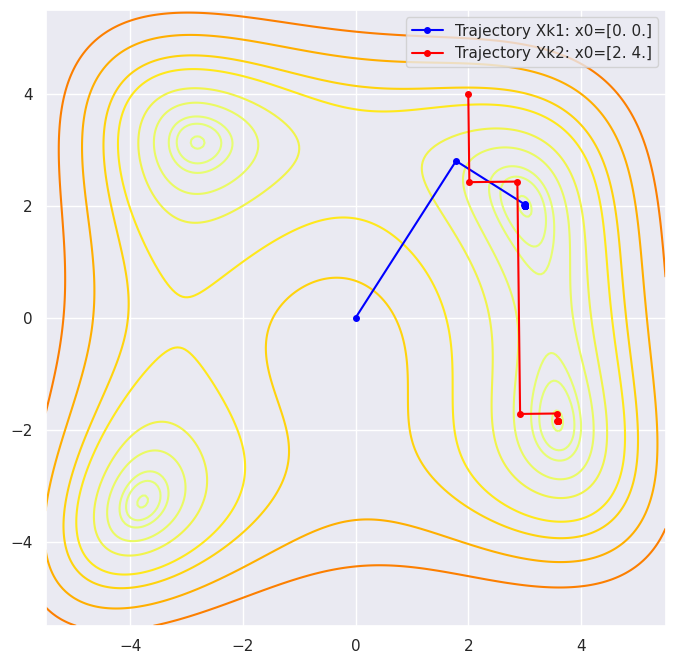

In [29]:
contornosFnc2D(fncHimmelblau, xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5,
               levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400],list_xk1=list_xk1, list_xk2=list_xk2)

**Función de Beale :** Para $\mathbf{x}=(x_1,x_2)$

$$ f(\mathbf{x}) = (1.5-x_1 + x_1x_2)^2 + (2.25 - x_1 + x_1x_2^2)^2 + (2.625 - x_1 + x_1x_2^3)^2.$$
$$ \mathbf{x}_0 = (2.,3.) $$
$$ \mathbf{x}_0 = (2.,4.) $$

In [30]:
def fncBeale(x):
    return (1.5-x[0]+x[0]*x[1])**2+(2.25-x[0]+x[0]*x[1]**2)**2+(2.625-x[0]+x[0]*x[1]**3)**2
def grad_fncBeale(x):
    return np.array([2*(1.5-x[0]+x[0]*x[1])*(-1+x[1])+2*(2.25-x[0]+x[0]*x[1]**2)*(-1+x[1]**2)+2*(2.625-x[0]+x[0]*x[1]**3)*(-1+x[1]**3),
                     2*(1.5-x[0]+x[0]*x[1])*x[0]+4*(2.25-x[0]+x[0]*x[1]**2)*x[0]*x[1]+6*(2.625-x[0]+x[0]*x[1]**3)*x[0]*x[1]**2])

Evaluación del método en los puntos iniciales a considerar son $ \mathbf{x}_0 = (2,3), \mathbf{x}_0 = (2,4) $.

In [31]:
x01 = np.array([2.,3.])
xk1, k1, conv1, list_xk1 = max_grad_sec_dor(fncBeale,grad_fncBeale,x01,tol1_fnc1,tol2_fnc1,N,Ngs)

print("Valor inicial x0:",x01)
print("Valor final xk:",xk1)
print("Número de iteraciones:",k1)
print("Valor de la función en xk:",fncBeale(xk1))
print("Converge:", conv1)

Valor inicial x0: [2. 3.]
Valor final xk: [2.99949464 0.49986994]
Número de iteraciones: 476
Valor de la función en xk: 4.141399142940228e-08
Converge: True


In [32]:
x02 = np.array([2.,4.])
xk2, k2, conv2, list_xk2 = max_grad_sec_dor(fncBeale,grad_fncBeale,x02,tol1_fnc1,tol2_fnc1,N,Ngs)

print("Valor inicial x0:",x02)
print("Valor final xk:",xk2)
print("Número de iteraciones:",k2)
print("Valor de la función en xk:",fncBeale(xk2))
print("Converge:", conv2)

Valor inicial x0: [2. 4.]
Valor final xk: [-5.01198678  1.16979168]
Número de iteraciones: 10000
Valor de la función en xk: 0.7330262659290426
Converge: False


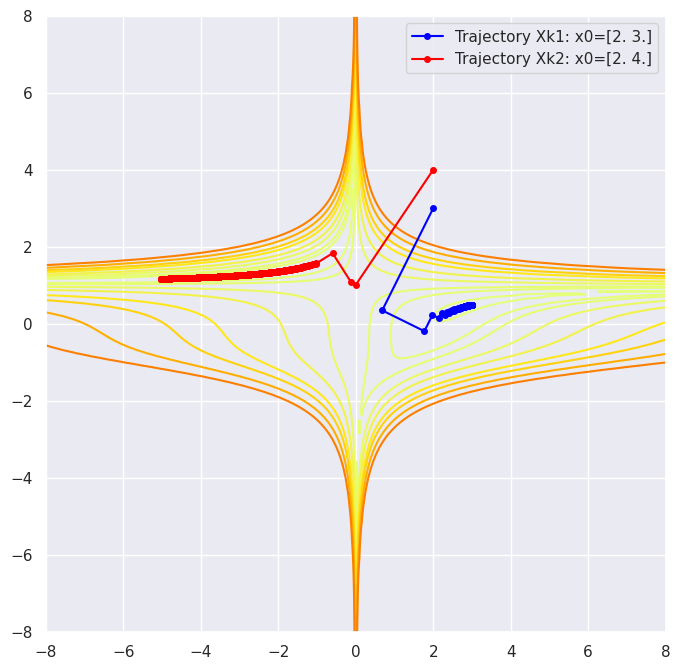

In [33]:
contornosFnc2D(fncBeale, xleft=-8, xright=8, ybottom=-8, ytop=8,
               levels=[0.0,0.5, 5, 10, 25, 50, 100, 150, 250, 400],list_xk1=list_xk1, list_xk2=list_xk2)

**Función de Rosenbrock:** Para $\mathbf{x}=(x_1,x_2, ..., x_n)$

$$ f(\mathbf{x}) = \sum_{i=1}^{n-1} \left[100(x_{i+1} - x_i^2)^2 + (1-x_i)^2 \right]
\quad n\geq 2.$$

In [34]:
def fncRosenbrock(x):
    return np.sum(100*(x[1:]-x[:-1]**2)**2+(1-x[:-1])**2)

def grad_fncRosenbrock(x):
    grad = np.zeros(len(x))
    grad[0] = -400*x[0]*(x[1]-x[0]**2)+2*x[0]-2
    grad[-1] = 200*(x[-1]-x[-2]**2)
    for i in range(1,len(x)-1):
        grad[i] = 200*(x[i]-x[i-1]**2)-400*x[i]*(x[i+1]-x[i]**2)+2*x[i]-2
    return grad

Evaluación del método en los puntos iniciales a considerar son 
- $ \mathbf{x}_0 = (-2.1, 4.5) $, 
- $ \mathbf{x}_0 = (-1.2, 1.0) $, 
- $ \mathbf{x}_0 = (-2.1, 4.5, -2.1, 4.5, -2.1, 4.5, -2.1, 4.5, -2.1, 4.5) $
- $ \mathbf{x}_0 = (-1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0) $.

In [35]:
x01 = np.array([-2.1,4.5])
xk1, k1, conv1, list_xk1 = max_grad_sec_dor(fncRosenbrock,grad_fncRosenbrock,x01,tol1_fnc1,tol2_fnc1,N,Ngs)

print("Valor inicial x0:",x01)
print("Valor final xk:",xk1)
print("Número de iteraciones:",k1)
print("Valor de la función en xk:",fncRosenbrock(xk1))
print("Converge:", conv1)

Valor inicial x0: [-2.1  4.5]
Valor final xk: [1.00298351 1.00600349]
Número de iteraciones: 3181
Valor de la función en xk: 8.977330530372036e-06
Converge: True


In [36]:
x02 = np.array([-1.2,1])
xk2, k2, conv2, list_xk2 = max_grad_sec_dor(fncRosenbrock,grad_fncRosenbrock,x02,tol1_fnc1,tol2_fnc1,N,Ngs)

print("Valor inicial x0:",x02)
print("Valor final xk:",xk2)
print("Número de iteraciones:",k2)
print("Valor de la función en xk:",fncRosenbrock(xk2))
print("Converge:", conv2)

Valor inicial x0: [-1.2  1. ]
Valor final xk: [1.00358896 1.0072132 ]
Número de iteraciones: 8323
Valor de la función en xk: 1.2930832027302698e-05
Converge: True


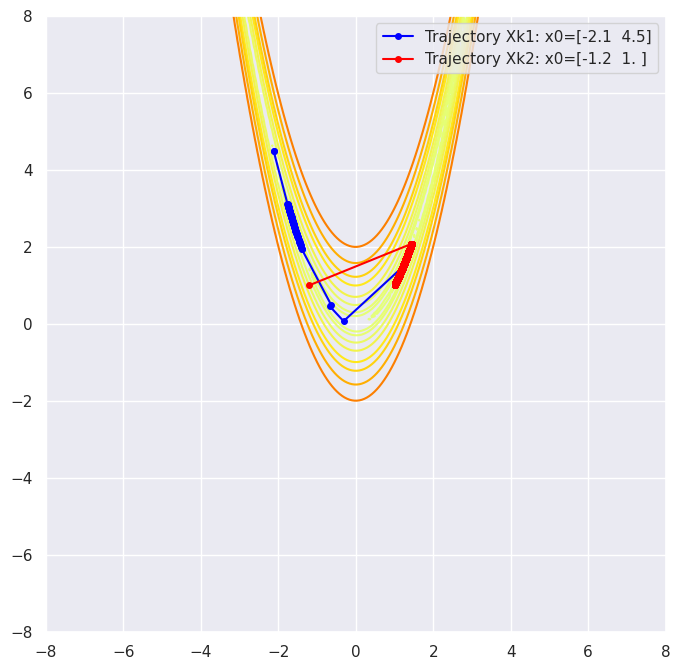

In [37]:
contornosFnc2D(fncRosenbrock, xleft=-8, xright=8, ybottom=-8, ytop=8,
               levels=[0.0,0.5, 5, 10, 25, 50, 100, 150, 250, 400],list_xk1=list_xk1, list_xk2=list_xk2)

In [38]:
x03 = np.array([-2.1,4.5,-2.1,4.5,-2.1,4.5,-2.1,4.5,-2.1,4.5])
xk3, k3, conv3, list_xk3 = max_grad_sec_dor(fncRosenbrock,grad_fncRosenbrock,x03,tol1_fnc1,tol2_fnc1,N,Ngs)

print("Valor inicial x0:",x03)
print("Valor final xk:",xk3)
print("Número de iteraciones:",k3)
print("Valor de la función en xk:",fncRosenbrock(xk3))
print("Converge:", conv3)

Valor inicial x0: [-2.1  4.5 -2.1  4.5 -2.1  4.5 -2.1  4.5 -2.1  4.5]
Valor final xk: [0.9999816  0.99996449 0.99992622 0.99985564 0.99970642 0.9994158
 0.99882494 0.99764883 0.99528897 0.99057778]
Número de iteraciones: 7987
Valor de la función en xk: 2.9638782255509747e-05
Converge: True


In [39]:
x04 = np.array([-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0])
xk4, k4, conv4, list_xk4 = max_grad_sec_dor(fncRosenbrock,grad_fncRosenbrock,x04,tol1_fnc1,tol2_fnc1,N,Ngs)

print("Valor inicial x0:",x04)
print("Valor final xk:",xk4)
print("Número de iteraciones:",k4)
print("Valor de la función en xk:",fncRosenbrock(xk4))
print("Converge:", conv4)

Valor inicial x0: [-1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1. ]
Valor final xk: [0.99998114 0.99996369 0.99992438 0.99985228 0.99969931 0.99940194
 0.9987968  0.9975928  0.99517666 0.99035379]
Número de iteraciones: 7846
Valor de la función en xk: 3.1070045276930966e-05
Converge: True


3. Evaluación del método el método cambiando los siguientes valores $ \mathbf{x}_0 = (-2.1, 4.5) $, $\tau_2 = \epsilon_m^{1/4}$ y $N_{gs}=50$

In [40]:
tol2_fnc1 = (np.finfo(float).eps)**(1/4)
Ngs = 50
x01 = np.array([-2.1,4.5])
xk1, k1, conv1, list_xk1 = max_grad_sec_dor(fncRosenbrock,grad_fncRosenbrock,x01,tol1_fnc1,tol2_fnc1,N,Ngs)

print("Valor inicial x0:",x01)
print("Valor final xk:",xk1)
print("Número de iteraciones:",k1)
print("Valor de la función en xk:",fncRosenbrock(xk1))
print("Converge:", conv1)

Valor inicial x0: [-2.1  4.5]
Valor final xk: [1.00375114 1.00752023]
Número de iteraciones: 8545
Valor de la función en xk: 1.4072540550757701e-05
Converge: True


In [41]:
x02 = np.array([-1.2,1])
xk2, k2, conv2, list_xk2 = max_grad_sec_dor(fncRosenbrock,grad_fncRosenbrock,x02,tol1_fnc1,tol2_fnc1,N,Ngs)

print("Valor inicial x0:",x02)
print("Valor final xk:",xk2)
print("Número de iteraciones:",k2)
print("Valor de la función en xk:",fncRosenbrock(xk2))
print("Converge:", conv2)

Valor inicial x0: [-1.2  1. ]
Valor final xk: [1.00371401 1.00746809]
Número de iteraciones: 3137
Valor de la función en xk: 1.3862900582516622e-05
Converge: True


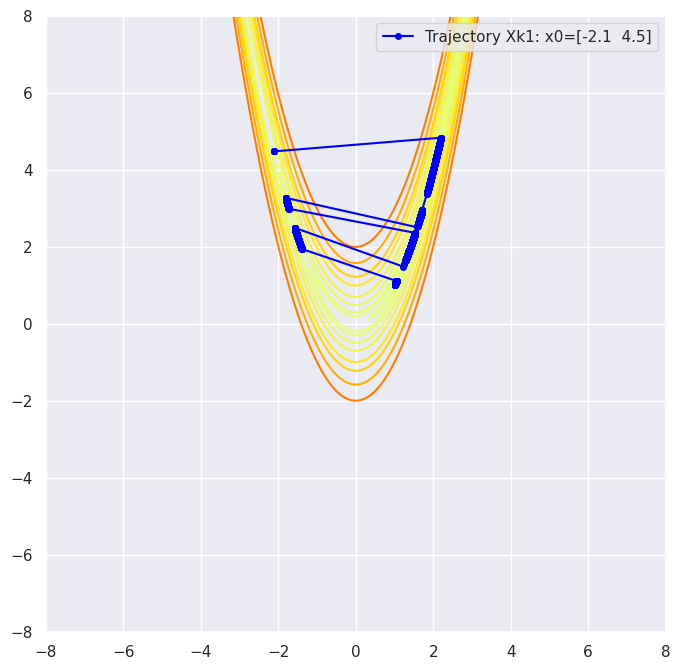

In [42]:
contornosFnc2D(fncRosenbrock, xleft=-8, xright=8, ybottom=-8, ytop=8,
               levels=[0.0,0.5, 5, 10, 25, 50, 100, 150, 250, 400],list_xk1=list_xk1)

Bajo la función analizada observamos que no es conveniente hacer este cambio, ya que aumenta el número de iteraciones del algoritmo en una gran proporción, este comportamiento se debe a que el estimar con menor presición el tamaño del paso, aumenta el número de iteraciones porque adiciona variabilidad a las direcciones de descenso.

Este comportamiento presenta ser beneficioso cuando la función no varie demasiado con respecto a variaciones de las direcciones de descenso.

# <font color="8C3061" >**Ejercicio 4 (1.5 puntos)**</font>

Sea $f(x)=(x-1)^2$ con $x \in \mathbb{R}$ y generamos la secuencia
$$
x_{k+1}=x_k-\frac{\alpha}{2^k} f^{\prime}\left(x_k\right)
$$
con $0<\alpha<1$, para obtener el minimizador de la función $f(x)$. ¿Tiene este algoritmo la propiedad de descenso, es decir, $f\left(x_{k+1}\right)<f\left(x_k\right)$ a partir de un cierto $k$ ? ¿Es el algoritmo globalmente convergente?

**Solución:**

Como $f$ es convexa, simétrica con respecto a uno y que su mínimo es 1, para que se cumple la condición de descenso es suficiente observar que $|x_{k+1}-1|< |x_k-1|$

$$
\begin{aligned}
x_{k+1}-1 &= x_{k+1}-x_k+x_k-1 \\
&=-\frac{\alpha}{2^k}f'(x_k)+x_k-1 \\
&=-\frac{\alpha}{2^{k-1}}(x_k-1)+x_k-1 \\
&=\left(1-\frac{\alpha}{2^{k-1}}\right)(x_k-1)
\end{aligned}
$$

Por tanto,

$$|x_{k+1}-1|=\left(1-\frac{\alpha}{2^{k-1}}\right)|x_k-1|<|x_k-1|$$

Ya que, $$0<\alpha<1 \leq 2^{k-1}$$

Veamos que no es globalmente convergente, para esto vamos a considerar una tolerancia de $\tau =10^{-6}$, consideremos 200 puntos iniciales, muestreados por una distribución uniforme en $[-10,10]$ y contemos los que convergen en menos de $60$ iteraciones.

In [43]:
def sequence_pow2(x0:np.ndarray,
                  f:Callable[[np.ndarray],float],
                  grad_f:Callable[[np.ndarray],np.ndarray],
                  alpha:float,
                  tol:float,
                  tol_2:float,
                  max_iter:int):
    
    xk = x0
    k = 0
    xk_list = [xk]
    while k < max_iter:
        xk1 = xk - alpha*grad_f(xk)/2**k
        xk_list.append(xk1)
        if abs(f(xk))< tol:
            return xk1, k, xk_list, True
        
        if abs(xk1-xk) < tol_2:
            return xk1, k, xk_list, False
        xk = xk1
        k += 1
    return xk, max_iter, xk_list, False

In [44]:
x0 = np.random.uniform(-10,10,200)
alpha = 0.8
tol = 1e-6

f = lambda x: (x-1)**2
grad_f = lambda x: 2*(x-1)
list_xconv = np.array([])
cont = 0
for xi in x0:
    xk, _, _, conv = sequence_pow2(xi,f,grad_f,alpha,tol)
    if conv:
        cont += 1
    list_xconv = np.append(list_xconv,xk)

Ningún valor convergió al mínimo global con esa tolerancia y número de iteraciones

In [45]:
print("Porcentaje de éxito:",cont/200)
print("min |xk-1|:",round(abs(list_xconv-1).min(),6))

Porcentaje de éxito: 0.0
min |xk-1|: 0.001111


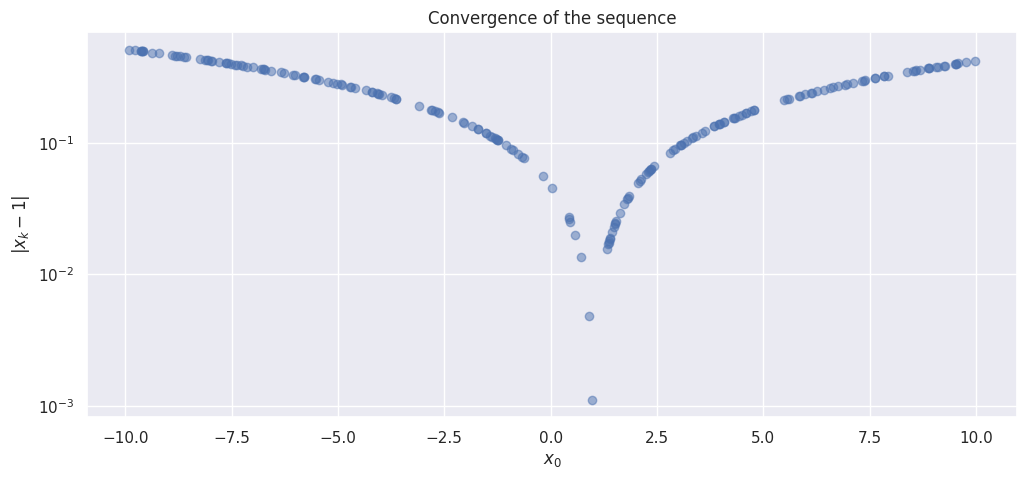

In [46]:
plt.figure(figsize=(12,5))
plt.scatter(x0,abs(list_xconv-1),alpha=0.5)
plt.xlabel('$x_0$')
plt.ylabel('$|x_k-1|$')
plt.title('Convergence of the sequence')
plt.yscale('log')
plt.show()

Ahora consideremos 200 valores de $\alpha$ muestreados por una distribución uniforme en $[0,1]$ y contemos los que convergen en menos de $60$ iteraciones.

In [47]:
cont2 = 0
alpha2 =np.random.uniform(0,1,200)
list_xconv2 = np.array([])
for alphak in alpha2:
    xk, _, _, conv = sequence_pow2(5,f,grad_f,alphak,tol)
    if conv:
        cont2 += 1
    list_xconv2 = np.append(list_xconv2,xk)

Ninguno converge al mínimo global con esta tolerancia

In [48]:
print("Porcentaje de éxito:",cont2/200)
print("min |xk-1|:",round(abs(list_xconv2-1).min(),6))

Porcentaje de éxito: 0.0
min |xk-1|: 0.006077


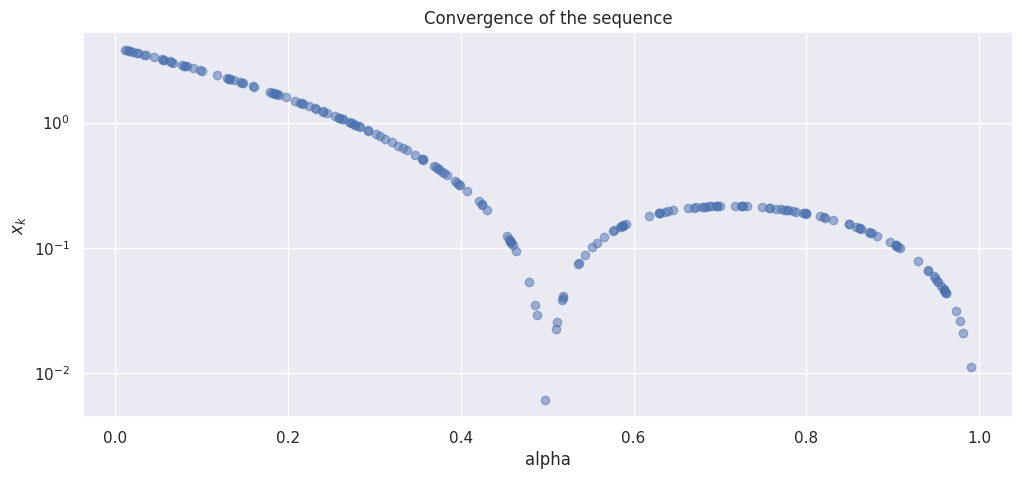

In [49]:
plt.figure(figsize=(12,5))
plt.scatter(alpha2,abs(list_xconv2-1),alpha=0.5)
plt.yscale('log')
plt.xlabel('alpha')
plt.ylabel('$x_k$')
plt.title('Convergence of the sequence')
plt.show()

*Convergencia de un caso en partícular:*

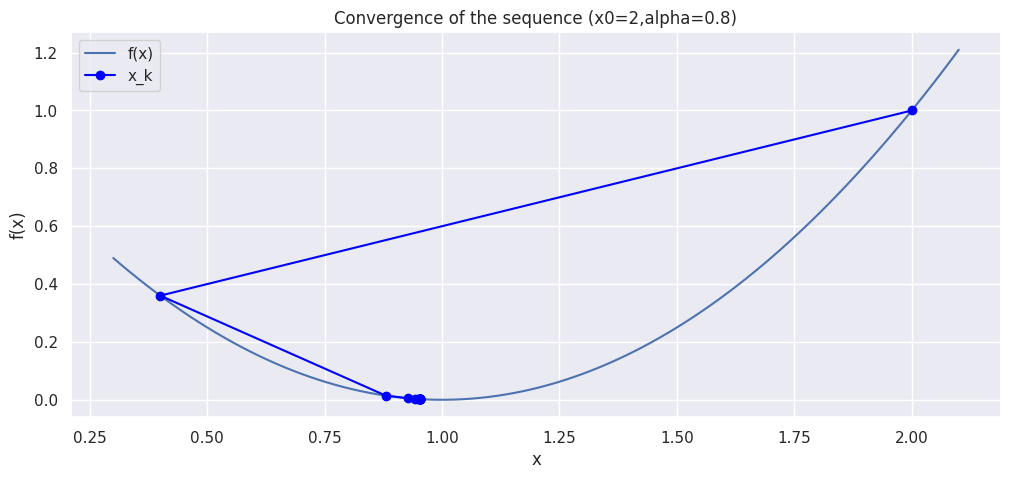

In [50]:
plt.figure(figsize=(12,5))
alpha3=0.8
x0 = 2
x = np.linspace(0.3,2.1,100)
xk, k, xk_list, conv = sequence_pow2(x0,f,grad_f,alpha3,tol)
plt.plot(x,f(x),label='f(x)')
plt.plot(xk_list,f(np.array(xk_list)),marker='o',linestyle='-',color='blue',label='x_k')
plt.xlabel('x')
plt.ylabel('f(x)') 
plt.title('Convergence of the sequence (x0=2,alpha=0.8)')
plt.legend()
plt.show()